In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


* In this activity, you will calculate a multiple regression line to predict the time from pour using the measurements of foam height and beer height.

## Instructions

* Use sklearn's linear regression model to perform multiple linear regression using the features foam height and beer height for `X` and time for `y`.

* Compute the R2 score for the training and testing data separately.

* Plot the Residuals for the Training and Testing data.

In [3]:
# Step 1: Read the data into a Pandas dataframe
foam = pd.read_csv("resources/foam.csv")
foam.head()

,time,foam,beer
0,0,17.4,0.60
1,15,15.1,2.20
2,30,13.1,3.40
3,45,11.6,4.15
4,60,10.6,4.50


In [6]:
# Step 2: Assign the X and y

# Remember that since y is a 1d value, you must reshape it
X, y = foam[["foam", "beer"]], foam["time"].values.reshape(-1, 1)

print(X.shape, y.shape)

(13, 2) (13, 1)


In [9]:
# Step 3: Use train_test_split to create a training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Step 4: Create the model using linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# Step 5: fit the model to the training data

model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 6: Get the R2 score for the training and testing data
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print("Training Score: {}".format(training_score))
print("Testing Score: {}".format(testing_score))

Training Score: 0.9907390608835368
Testing Score: 0.940081803648188


Text(0.5, 1.0, 'Residual Plot of Beer Foam')

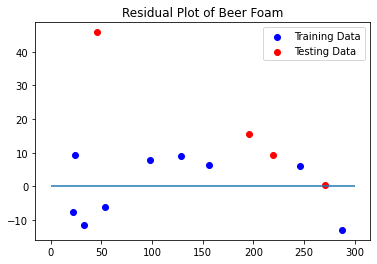

In [14]:
# Step 7: Plot the scores on a residual plot to view the models effectiveness

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='blue', label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='red', label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot of Beer Foam")